In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sitka.general.settings import *
from sitka.io.time import *
from sitka.io.weather import *
from sitka.calculations.solar import *
from sitka.components.site import *

In [3]:
dir_path = os.getcwd()
weather_file = os.path.join(dir_path, 'USA_WA_Seattle-Boeing.Field.727935_TMY3.epw')

In [4]:
start_hour = 0
end_hour = 8760
time_steps_per_hour = 4

In [5]:
# Simulation run parameters
settings = Settings(dir_path)

time = Time(start_hour=start_hour, end_hour=end_hour, time_steps_per_hour=time_steps_per_hour)

weather = EPW(settings, time, weather_file)
print(weather.location)

# Setup site
site = Site(weather.latitude, weather.longitude, weather.elevation)
print(site.latitude)
print(site.longitude)

# Solar angles
solar_angles = SolarAngles(time, site)

Updating time object
Importing weather data.
file imported.
Resampling weather data.
Seattle Boeing Field  Isis
47.68
-122.25
Updating solar angles


# Analysis

## Inputs

In [6]:
# Comfort criteria
min_dry_bulb_temperature = 15  # deg C
max_dry_bulb_temperature = 25  # deg C

## Comfort Determination

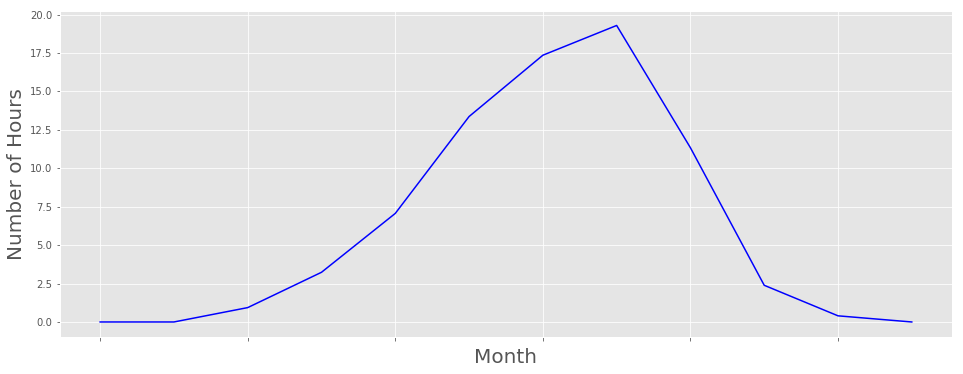

In [7]:
# Determine whether dry-bulb temperature is within the comfort criteria
comfort = pd.DataFrame({
        'dry_bulb_temperature': weather.dry_bulb_temperature,
        'comfortable': np.ones(weather.dry_bulb_temperature.count())*0,
})

criteria = ((comfort['dry_bulb_temperature'] >= min_dry_bulb_temperature) & (comfort['dry_bulb_temperature'] <= max_dry_bulb_temperature))
comfort[criteria] = 1

comfort = comfort.resample('1H').min().resample('1D').sum().resample('1M').mean()

comfort.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = comfort['comfortable'].plot(legend=False, color=['blue', 'red', 'purple'], figsize=(16, 6))

ax.set_ylabel('Number of Hours', fontsize=20)
ax.set_xlabel('Month', fontsize=20)

In [8]:
temp = {
    'Comfortable': [],
    'Cold': [],
    'Hot': [],
}

for i in range(1, 13):   
    month_data = df2.copy()[(df2.index.month == i)]
    
    var = month_data['dry_bulb_temperature'][(month_data['dry_bulb_temperature'] < min_dry_bulb_temperature)].count()
    temp['Cold'].append(var)
    month_data = month_data[(month_data['dry_bulb_temperature'] >= min_dry_bulb_temperature)]
    
    var = month_data['dry_bulb_temperature'][(month_data['dry_bulb_temperature'] > max_dry_bulb_temperature)].count()
    temp['Hot'].append(var)
    month_data = month_data[(month_data['dry_bulb_temperature'] <= max_dry_bulb_temperature)]
    
    temp['Acceptable'].append(month_data['name'].count())

NameError: name 'df2' is not defined